<a href="https://colab.research.google.com/github/idanhasdai/Penguin-Species-Classification-Data-Analysis./blob/main/final_data_analysis_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#imports
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import KNNImputer
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import OneHotEncoder

In [ ]:
#loading the dataset...
df = sns.load_dataset('penguins')

### a little bit of EDA

In [ ]:
#cheking to see the data frame looks good
df.head(3)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female


In [ ]:
#checking in what columns we have nulls and what are the data types of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [ ]:
#looking what columns i should encode
df.nunique()

species                3
island                 3
bill_length_mm       164
bill_depth_mm         80
flipper_length_mm     55
body_mass_g           94
sex                    2
dtype: int64

In [ ]:
#checking in what columns i have nulls and how much
df.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [ ]:
#looking at the nulls in the data frame
df[df.isnull().any(axis=1)]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,NaN


### Fill NaN rows

In [ ]:
#filling the NaNs in the sex column using mode(common)
df['sex'].fillna(df['sex'].mode()[0],inplace = True)

C:\Users\idanh\AppData\Local\Temp\ipykernel_13024\612968544.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['sex'].fillna(df['sex'].mode()[0],inplace = True)


In [ ]:
#filling the numeric NaN rows using the KNN Imputer
num_cols = ['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']
imputer = KNNImputer(n_neighbors = 5)
df[num_cols] = imputer.fit_transform(df[num_cols])

In [ ]:
#making sure we dont have anymore nulls
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     344 non-null    float64
 3   bill_depth_mm      344 non-null    float64
 4   flipper_length_mm  344 non-null    float64
 5   body_mass_g        344 non-null    float64
 6   sex                344 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [ ]:
#making sure again...
df.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

### One Hot Encoding

In [ ]:
#defining the one hot encoder tool
ohe = OneHotEncoder(sparse_output = False, drop = 'first')

#fitting the columns i want to encode to the tool
encoded = ohe.fit_transform(df[['sex','island']])

#making it back to a data fram
df_e = pd.DataFrame(encoded,columns = ohe.get_feature_names_out(['sex','island']))

#concating both the df's i made
df_code = pd.concat([df,df_e],axis = 1)

#dropping the old columns (not encoded ones)
df_code = df_code.drop(['sex','island'],axis = 1)

In [ ]:
#making sure its encoded
df_code.head(3)

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex_Male,island_Dream,island_Torgersen
0,Adelie,39.1,18.7,181.0,3750.0,1.0,0.0,1.0
1,Adelie,39.5,17.4,186.0,3800.0,0.0,0.0,1.0
2,Adelie,40.3,18.0,195.0,3250.0,0.0,0.0,1.0


### label encoding

In [ ]:
#defining the label encoder tool
le = LabelEncoder()

#fit transforming the tool to the target column
df_code['species'] = le.fit_transform(df_code['species'])

In [ ]:
#checking the tail of the new df to see if i label encoded it corectlly
df_code.tail(3)

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex_Male,island_Dream,island_Torgersen
341,2,50.4,15.7,222.0,5750.0,1.0,0.0,0.0
342,2,45.2,14.8,212.0,5200.0,0.0,0.0,0.0
343,2,49.9,16.1,213.0,5400.0,1.0,0.0,0.0


In [ ]:
#checking the head of the new df to make sure its labeled correctyl
df_code.head(3)

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex_Male,island_Dream,island_Torgersen
0,0,39.1,18.7,181.0,3750.0,1.0,0.0,1.0
1,0,39.5,17.4,186.0,3800.0,0.0,0.0,1.0
2,0,40.3,18.0,195.0,3250.0,0.0,0.0,1.0


### choosing feature and target, scaling them, and train test splitting them

In [ ]:
#choosing the feature and target columns
X = df_code.drop(columns = ['species'],axis = 1)
y = df_code['species']

#standard scaling the feature columns so i dont have outliers
scaler = StandardScaler()
X = scaler.fit_transform(X)

#train test splitting the features and target
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

### defining and training the models i chose

In [ ]:
#defining the random forest model
rf = RandomForestClassifier(n_estimators = 500,
                            random_state = 42,
                            max_depth = 10,
                            min_samples_leaf = 1,
                            min_samples_split = 2,
                            max_features = 'log2'
)

#defining the logistic regression model
lr = LogisticRegression()

In [ ]:
#training the logistic regression model
lr.fit(X_train,y_train)

LogisticRegression()

In [ ]:
#training the random forest model
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, max_features='log2', n_estimators=500,
                       random_state=42)

In [ ]:
#predicting the test variables for both models
rf_y_pred = rf.predict(X_test)
lr_y_pred = lr.predict(X_test)

In [ ]:
#accuracy scores
rf_accuracy = accuracy_score(y_test, rf_y_pred)
lr_accuracy = accuracy_score(y_test,lr_y_pred)

print(f'Random Forest Accuracy: {rf_accuracy}')
print(f'Logistic Regression Accuracy: {lr_accuracy}')

Random Forest Accuracy: 0.9855072463768116
Logistic Regression Accuracy: 1.0


In [ ]:
#precision scores
rf_precision = precision_score(y_test, rf_y_pred, average = 'weighted')
lr_precision = precision_score(y_test, lr_y_pred,average = 'weighted')

print(f'Random Forest Precision: {rf_precision}')
print(f'Logistic Regression Precision: {lr_precision}')

Random Forest Precision: 0.9859464207290294
Logistic Regression Precision: 1.0


In [ ]:
#recall scores
rf_recall = recall_score(y_test, rf_y_pred,average = 'weighted')
lr_recall = recall_score(y_test, lr_y_pred,average = 'weighted')

print(f'Random Forest Recall Score: {rf_recall}')
print(f'Logistic Regression Recall Score: {lr_recall}')

Random Forest Recall Score: 0.9855072463768116
Logistic Regression Recall Score: 1.0


In [ ]:
#f1 scores
rf_f1 = f1_score(y_test, rf_y_pred,average = 'weighted')
lr_f1 = f1_score(y_test, lr_y_pred,average = 'weighted')

print(f'Random Forest F1 Score: {rf_f1}')
print(f'Logistic Regression F1 Score: {lr_f1}')

Random Forest F1 Score: 0.9853849750062934
Logistic Regression F1 Score: 1.0


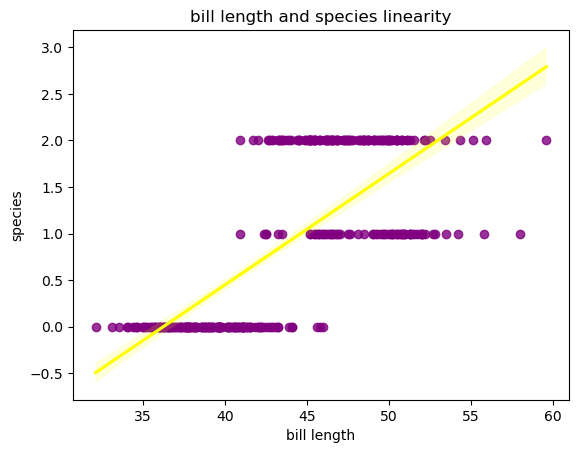

In [ ]:
#making a regplot that shows the linear simplicity
sns.regplot(x = 'bill_length_mm',
            y = 'species',
            data = df_code,
            scatter_kws={'color': 'purple'},
            line_kws={'color': 'yellow'})

plt.xlabel('bill length')
plt.ylabel('species')
plt.title('bill length and species linearity')
plt.show()

### checking for overfitting

In [ ]:
#checking the delta between the train and the test of the Logistic Regression model to see if we have overfitting
lr_y_train = lr.predict(X_train)
Test_Accuracy = accuracy_score(y_test, lr_y_pred)
Train_Accuracy = accuracy_score(y_train, lr_y_train)
Delta = Test_Accuracy - Train_Accuracy
print('Model Performance:')
print(f" Test Accuracy: {Test_Accuracy}")
print(f" Train Accuracy: {Train_Accuracy}")
print(f' The Delta between the test and the train is: {Delta}')

Model Performance:
 Test Accuracy: 1.0
 Train Accuracy: 0.9963636363636363
 The Delta between the test and the train is: 0.0036363636363636598


In [ ]:
#checking the delta between the train and the test of the Random Forest model to see if we have overfitting
rf_y_train = rf.predict(X_train)
Test_Accuracy = accuracy_score(y_test, rf_y_pred)
Train_Accuracy = accuracy_score(y_train, rf_y_train)
Delta = Test_Accuracy - Train_Accuracy
print('Model Performance:')
print(f" Test Accuracy: {Test_Accuracy}")
print(f" Train Accuracy: {Train_Accuracy}")
print(f' The Delta between the test and the train is: {Delta}')

Model Performance:
 Test Accuracy: 0.9855072463768116
 Train Accuracy: 1.0
 The Delta between the test and the train is: -0.01449275362318836


### Checking where the Disagreement/Outlire is

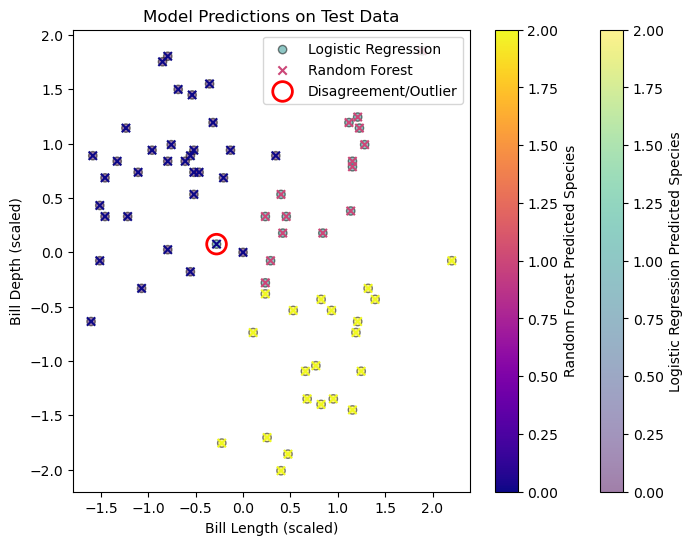

<Figure size 640x480 with 0 Axes>

In [ ]:
#made a plot that shows where the Disagreement Between the two models is
plt.figure(figsize=(8, 6),dpi = 100)
mask_diff = (lr_y_pred != rf_y_pred)

#Logistic Regression predictions
sp1 = plt.scatter(X_test[:, 0],
                  X_test[:, 1],
                  c=lr_y_pred,
                  cmap='viridis',
                  edgecolor='k',
                  label='Logistic Regression',
                  alpha = 0.5)

#Random Forest predictions with a different marker and colormap
sp2 = plt.scatter(X_test[:, 0],
                  X_test[:, 1],
                  c=rf_y_pred,
                  cmap='plasma',
                  marker='x',
                  label='Random Forest')

#Making the circle to show the Disagreement
plt.scatter(X_test[mask_diff, 0],
            X_test[mask_diff, 1],
            s=200,
            facecolors='none',
            edgecolors='red',
            linewidths=2,
            label='Disagreement/Outlier')

plt.xlabel('Bill Length (scaled)')
plt.ylabel('Bill Depth (scaled)')
plt.title('Model Predictions on Test Data')

#separate colorbars for clarity
plt.colorbar(sp1, label='Logistic Regression Predicted Species')
plt.colorbar(sp2, label='Random Forest Predicted Species')
plt.legend()
plt.show()

plt.savefig('outlier scatter.jpeg')

### Confusion Matrix Heatmaps

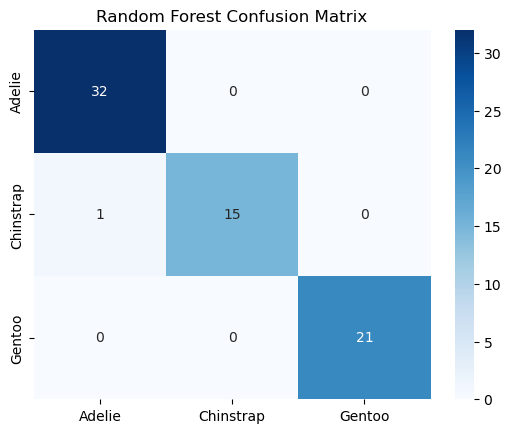

In [ ]:
#defining the confusion matrix and heatmap for the Random Forest confusion matrix
rf_confusion_matrix = confusion_matrix(y_test,rf_y_pred)
sns.heatmap(rf_confusion_matrix,
            annot = True,
            fmt = 'd',
            cmap = 'Blues',
            xticklabels=le.classes_,
            yticklabels=le.classes_
)
plt.title('Random Forest Confusion Matrix')
plt.show()

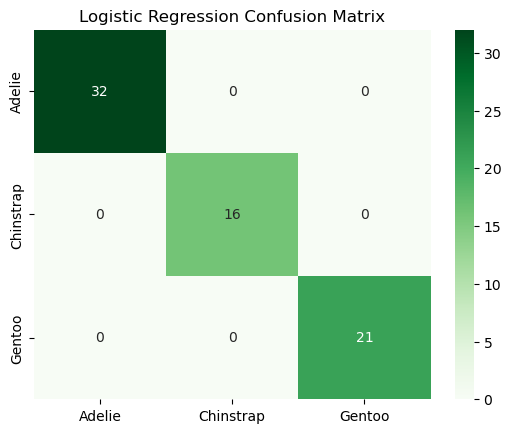

In [ ]:
#defining the confusion matrix and heatmap for the Logistic Regression model
lg_confusion_matrix = confusion_matrix(y_test,lr_y_pred)
sns.heatmap(lg_confusion_matrix,
            annot = True,
            fmt = 'd',
            cmap = 'Greens',
            xticklabels=le.classes_,
            yticklabels=le.classes_
)
plt.title('Logistic Regression Confusion Matrix')
plt.show()